In [1]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Add Check for .tgz file present
!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar xf /content/spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install -q handyspark

In [3]:
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
import string
import pyspark
from handyspark import * 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns  
from pyspark.sql.functions import col, asc,desc

In [4]:
spark = SparkSession.builder\
         .master("local")\
         .appName("Colab")\
         .config('spark.ui.port', '4050')\
         .getOrCreate()

In [5]:
ROOT = "/content/drive/MyDrive/MyAnimeList-parquet/"

In [6]:
current_time = datetime.now()
print("Current Time =", current_time)
anime_df = spark.read.format("parquet").option("header", "true") \
                                   .option("headers", "true") \
                                   .option('escape','"') \
                                   .option("inferSchema", "true") \
                                   .load(ROOT + "anime_cleaned.parquet", sep=',')
current_time = datetime.now()
print("Current Time =", current_time)                                  

Current Time = 2022-12-09 11:12:02.532358
Current Time = 2022-12-09 11:12:09.294764


In [7]:
current_time = datetime.now()
print("Current Time =", current_time)
user_df = spark.read.format("parquet").option("header", "true") \
                                   .option("headers", "true") \
                                   .option('escape','"') \
                                   .option("inferSchema", "true") \
                                   .load(ROOT + "users_cleaned.parquet", sep=',')
current_time = datetime.now()     
print("Current Time =", current_time)                         

Current Time = 2022-12-09 11:12:09.312823
Current Time = 2022-12-09 11:12:09.548162


In [8]:
current_time = datetime.now()
print("Current Time =", current_time)
UA_df = spark.read.format("parquet").option("header", "true") \
                                   .option("headers", "true") \
                                   .option('escape','"') \
                                   .option("inferSchema", "true") \
                                   .load(ROOT + "animelists_cleaned.parquet", sep=',')
current_time = datetime.now()
print("Current Time =", current_time)                                   

Current Time = 2022-12-09 11:12:09.567442
Current Time = 2022-12-09 11:12:09.782872


In [9]:
anime_df.show(5)

+--------+-------------------+--------------------+----------------------+--------------------+--------------------+----+--------+--------+---------------+------+--------------------+--------------------+---------------+--------------------+-----+---------+------+----------+-------+---------+--------------------+-----------+------------------+--------------------+--------------------+----------------+----------------+--------------------+--------------------+--------------------+------------+---------------+
|anime_id|              title|       title_english|        title_japanese|      title_synonyms|           image_url|type|  source|episodes|         status|airing|        aired_string|               aired|       duration|              rating|score|scored_by|  rank|popularity|members|favorites|          background|  premiered|         broadcast|             related|            producer|        licensor|          studio|               genre|       opening_theme|        ending_theme|du

In [10]:
print("No of animes: ",anime_df.count())

No of animes:  6668


In [11]:
anime_df.describe().show()

+-------+------------------+--------------------+-----------------+------------------------------------+------------------+--------------------+-----+------------+------------------+----------------+------------------+--------------------+--------+------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+-----------+--------------------+--------------------+--------------------+-------------------+--------------------+------+--------------------+--------------------+------------------+------------------+
|summary|          anime_id|               title|    title_english|                      title_japanese|    title_synonyms|           image_url| type|      source|          episodes|          status|      aired_string|               aired|duration|      rating|            score|        scored_by|             rank|        popularity|           members|         favorites|          background|  premiere

In [12]:
user_df.show(5)

+--------------+-------+-------------+--------------+-----------+------------+----------------+------------------------+------+-------------------+-------------------+-----------+-------------------+-------------------+----------------+---------------+--------------+
|      username|user_id|user_watching|user_completed|user_onhold|user_dropped|user_plantowatch|user_days_spent_watching|gender|           location|         birth_date|access_rank|          join_date|        last_online|stats_mean_score|stats_rewatched|stats_episodes|
+--------------+-------+-------------+--------------+-----------+------------+----------------+------------------------+------+-------------------+-------------------+-----------+-------------------+-------------------+----------------+---------------+--------------+
|      karthiga|2255153|            3|            49|          1|           0|               0|       55.09166666666667|Female|    Chennai, India |1990-04-29 00:00:00|       null|2013-03-03 00:00:

In [13]:
print("No of users: ",user_df.count())

No of users:  108711


In [14]:
user_df.describe().show()

+-------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------------+----------+------------------------+-------------------+-----------+-------------------+-------------------+------------------+-----------------+------------------+
|summary|            username|           user_id|     user_watching|    user_completed|       user_onhold|      user_dropped|  user_plantowatch|user_days_spent_watching|    gender|                location|         birth_date|access_rank|          join_date|        last_online|  stats_mean_score|  stats_rewatched|    stats_episodes|
+-------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------------+----------+------------------------+-------------------+-----------+-------------------+-------------------+------------------+-----------------+------------------

In [15]:
UA_df.show(5)

+--------+--------+-------------------+-------------+--------------+--------+---------+-------------+----------------+-------------------+-------+
|username|anime_id|my_watched_episodes|my_start_date|my_finish_date|my_score|my_status|my_rewatching|my_rewatching_ep|    my_last_updated|my_tags|
+--------+--------+-------------------+-------------+--------------+--------+---------+-------------+----------------+-------------------+-------+
|karthiga|      21|                586|   0000-00-00|    0000-00-00|       9|        1|         null|               0|2013-03-03 10:52:53|   null|
|karthiga|      59|                 26|   0000-00-00|    0000-00-00|       7|        2|         null|               0|2013-03-10 13:54:51|   null|
|karthiga|      74|                 26|   0000-00-00|    0000-00-00|       7|        2|         null|               0|2013-04-27 16:43:35|   null|
|karthiga|     120|                 26|   0000-00-00|    0000-00-00|       7|        2|         null|               0|

In [16]:
print("No of anime-user pairs: ",UA_df.count())

No of anime-user pairs:  31284030


In [17]:
anime_df.sort(anime_df.members.desc()).select('title','members','score').show(10)

+--------------------+-------+-----+
|               title|members|score|
+--------------------+-------+-----+
|          Death Note|1456378| 8.67|
|  Shingeki no Kyojin|1345842| 8.49|
|    Sword Art Online|1301616| 7.64|
|Fullmetal Alchemi...|1199091| 9.25|
|       One Punch Man|1020754| 8.73|
|         Tokyo Ghoul|1013138|  8.0|
|        Angel Beats!|1010771| 8.31|
|         Steins;Gate|1010330| 9.14|
|Code Geass: Hangy...| 986897| 8.79|
|              Naruto| 980265| 7.88|
+--------------------+-------+-----+
only showing top 10 rows



In [18]:
anime_df.sort(anime_df.score.desc()).filter(anime_df.members>1000).select('title','members','score').show(10)

+--------------------+-------+-----+
|               title|members|score|
+--------------------+-------+-----+
|Fullmetal Alchemi...|1199091| 9.25|
|      Kimi no Na wa.| 730076| 9.19|
|            Gintama°| 198744| 9.15|
|       Steins;Gate 0| 223989| 9.15|
|         Steins;Gate|1010330| 9.14|
|       Gintama&#039;| 215527| 9.11|
|Ginga Eiyuu Densetsu| 124993| 9.11|
|Hunter x Hunter (...| 720920| 9.11|
|3-gatsu no Lion 2...|  85744|  9.1|
|Gintama&#039;: En...| 123572| 9.07|
+--------------------+-------+-----+
only showing top 10 rows



In [19]:
hdf = anime_df.toHandy()

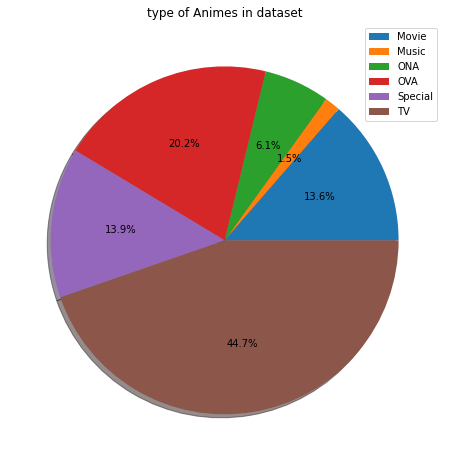

In [20]:
hdf.cols['type'].value_counts().plot.pie(autopct='%.1f%%',labels=None,shadow=True,figsize=(8,8))
plt.title('type of Animes in dataset')
plt.ylabel('')
plt.legend(hdf.cols['type'].value_counts().index.tolist(),loc='upper right')
plt.show()

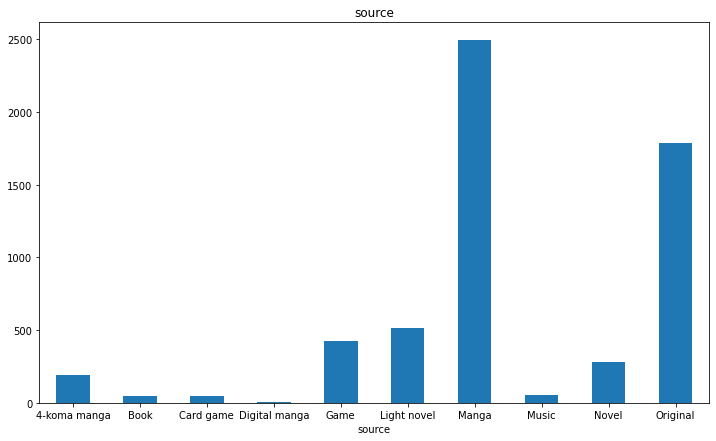

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))
hdf.cols['source'].hist(ax=ax)
plt.show()

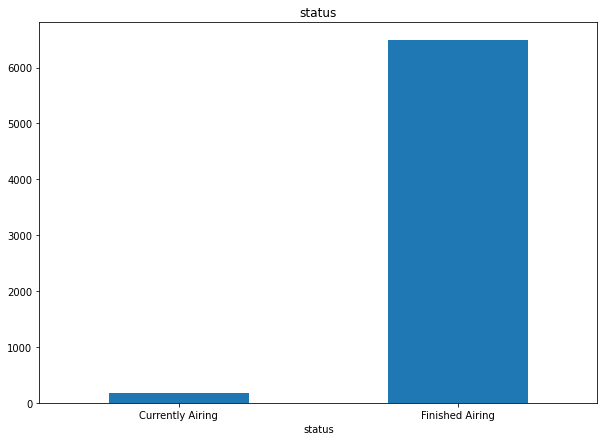

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['status'].hist(ax=ax)
plt.show()

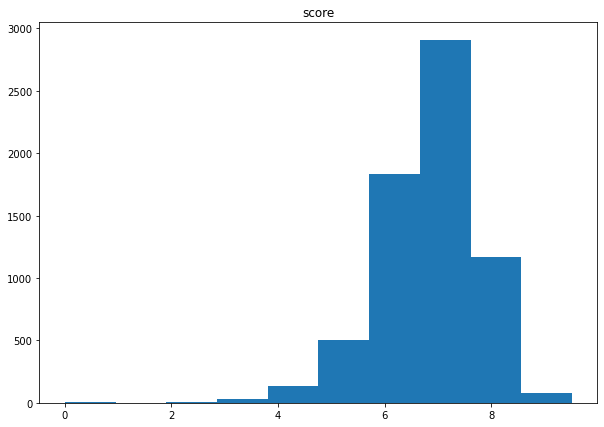

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['score'].hist(ax=ax)
plt.show()

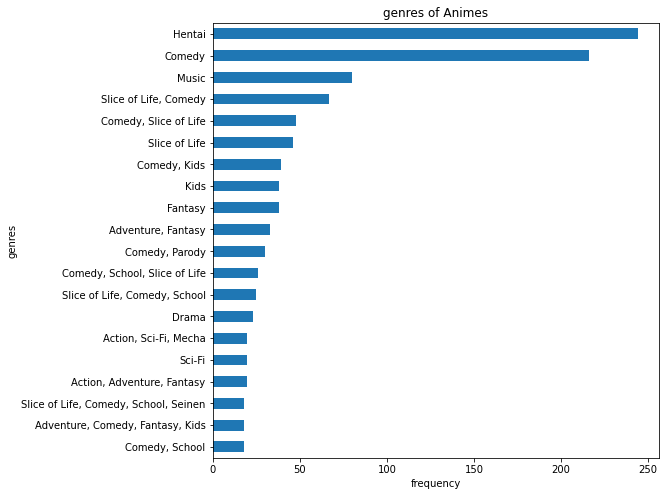

In [24]:
hdf.cols['genre'].value_counts().sort_values(ascending=True).tail(20).plot.barh(figsize=(8,8))
plt.title('genres of Animes')
plt.xlabel('frequency')
plt.ylabel('genres')
plt.show()

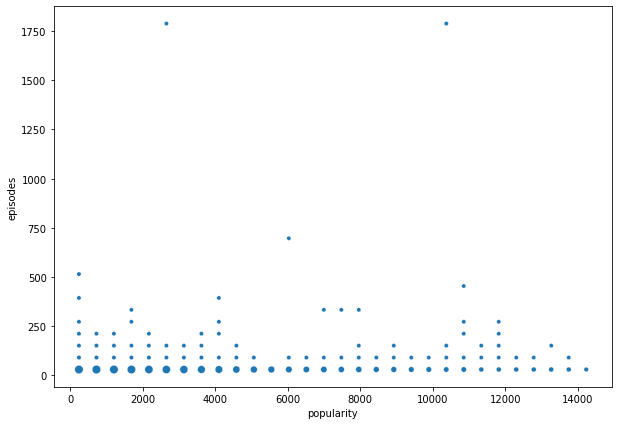

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['popularity', 'episodes']].scatterplot(ax=ax)
plt.show()


INFO: Safety is ON - returning up to 1000 instances.


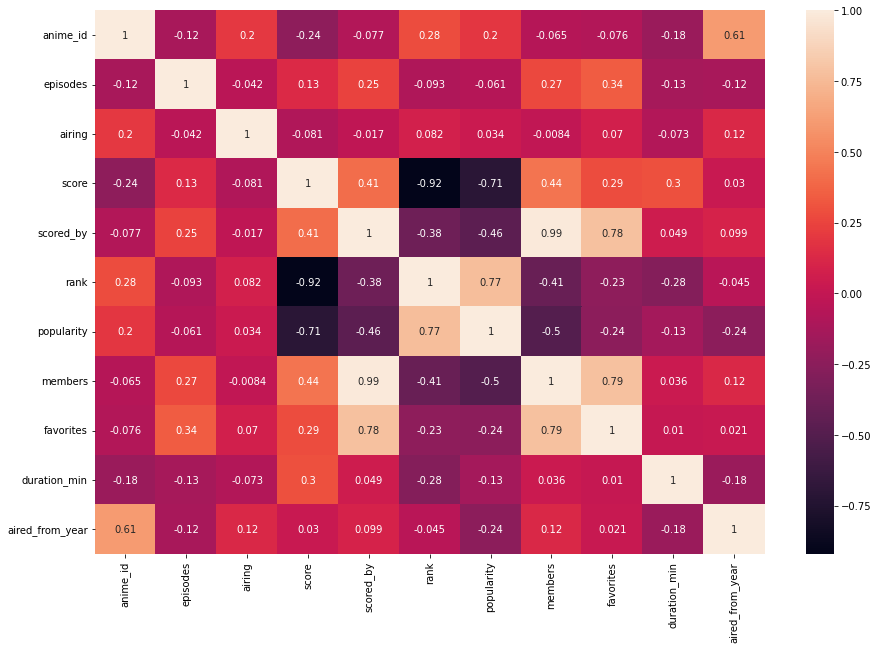

In [26]:
data = hdf.toPandas()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()


Inference: 
* members and scored_br are highly correlated = 0.99
* score and rank are inversely correlated = -0.92

In [27]:
hdf1 = user_df.toHandy()

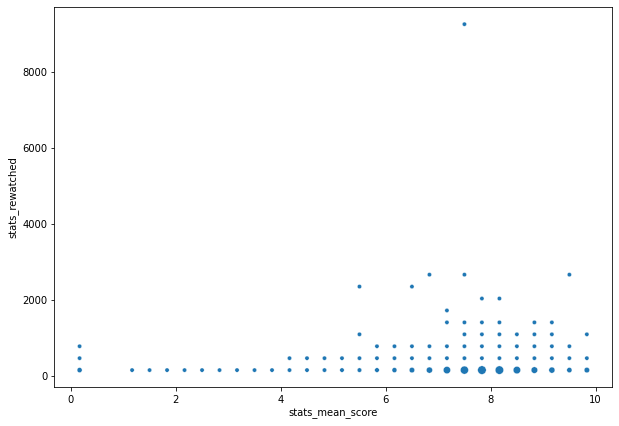

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf1.cols[['stats_mean_score', 'stats_rewatched']].scatterplot(ax=ax)
plt.show()


INFO: Safety is ON - returning up to 1000 instances.


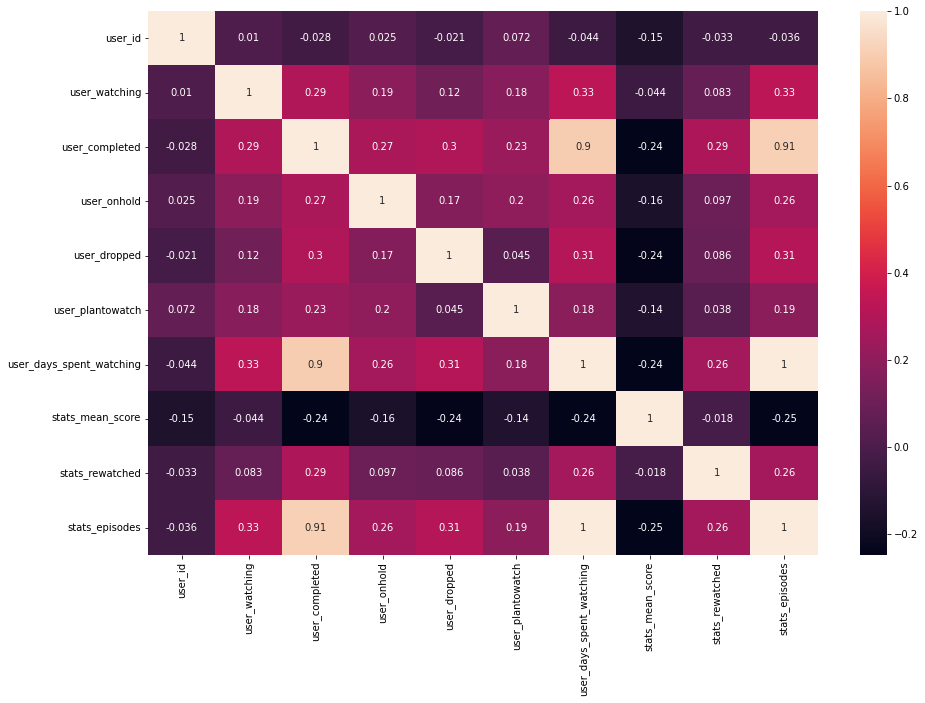

In [29]:
data = hdf1.toPandas()
data = data.drop('access_rank', axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

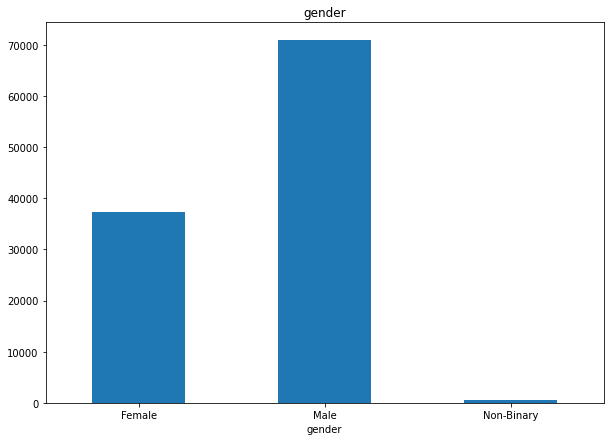

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf1.cols['gender'].hist(ax=ax)
plt.show()

User Completed and stats_episode - 0.91

In [31]:
hdf2 = UA_df.toHandy()

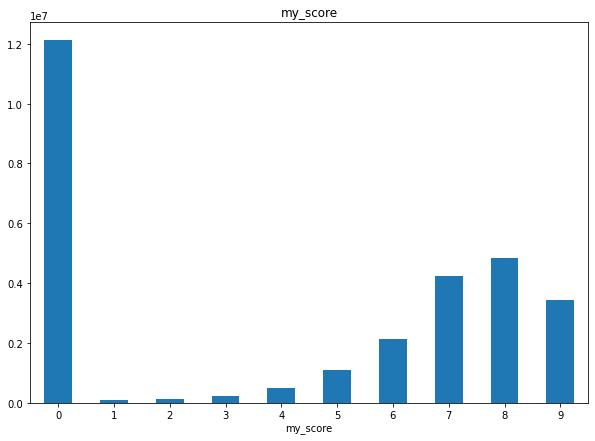

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf2.cols['my_score'].hist(ax=ax)
plt.show()

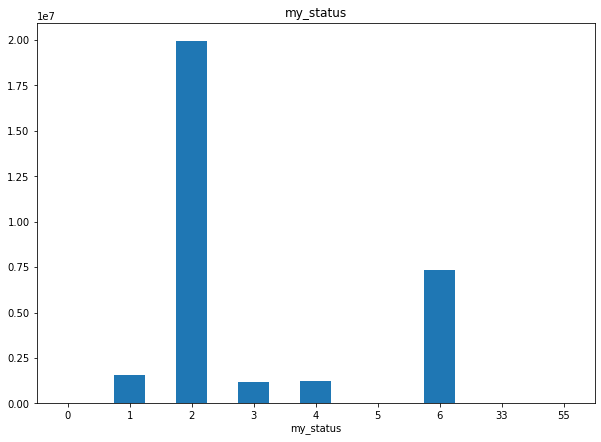

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf2.cols['my_status'].hist(ax=ax)
plt.show()